# TimeCourse
The `pycopi.TimeCourse` class enables a user to run an COPASI model deterministically. Future versions of PyCoTools will implement the alternative sovlers that COPASI offers and they will be accessible via a keyword argument, but presently these features are not implemented. 

## Get Model Path
PyCoTools works with directories to copasi files so first we need to get the location of the example model on disk

In [2]:
%matplotlib inline
import os,glob

for i in glob.glob('*.cps'):
    kholodenko_model= os.path.abspath(i)
    
print kholodenko_model
print os.path.isfile(kholodenko_model)

/home/b3053674/Documents/PyCoTools/PyCoTools/PyCoToolsTutorial/Kholodenko.cps
True


To run deterministic time course with kholodenko model we have a few options. We can:
    1. Collect all copasi output as tab separated file using the `ReportName` keyword.

In [6]:
import PyCoTools
import os
import pandas
TC= PyCoTools.pycopi.TimeCourse(kholodenko_model,
                        ReportName='kholodenko_timecourse_report.txt',
                        ## Intervals*StepSize must equal End
                        End=1000,    
                        Intervals=50,
                        StepSize=20)

## check its worked
print os.path.isfile(TC.kwargs['ReportName'])
print pandas.read_csv(TC.kwargs['ReportName'],sep='\t').head()

True
   Time       Mek1-PP      Erk2      Mos   Erk2-P   Erk2-PP     Mos-P  \
0     0  1.000000e+01  280.0000  90.0000   10.000  10.00000  10.00000   
1    20  8.258900e-07   96.4562  90.9152  193.535  10.00870   9.08483   
2    40  7.499460e-07   96.6709  91.7474  193.326  10.00350   8.25262   
3    60  6.809490e-07   96.8860  92.5040  193.116   9.99826   7.49600   
4    80  6.182710e-07   97.1012  93.1918  192.906   9.99302   6.80821   

         Mek1   Mek1-P  
0  280.000000   10.000  
1    0.048668  299.951  
2    0.053598  299.946  
3    0.059036  299.941  
4    0.065033  299.935  


    2. Collect results only for selected model variables only by passing a list to the `Metabolites` keyword. When no argument is specified, all model variables are selected by default:

In [4]:
import pandas,os
import PyCoTools
TC=PyCoTools.pycopi.TimeCourse(kholodenko_model,
                            ReportName='kholodenko_timecourse_report.txt',
                            End=1000,
                            Intervals=50,
                            StepSize=20,
                            Plot='false',
                            SaveFig='true',
                            Metabolites=['Mek1-P','Mek1'],
                            GlobalQuantities = [])

##check that we only have two variables
print pandas.read_csv(TC.kwargs['ReportName'],sep='\t').head()

   Time   Mek1-P        Mek1
0     0   10.000  280.000000
1    20  299.951    0.048668
2    40  299.946    0.053598
3    60  299.941    0.059036
4    80  299.935    0.065033


    3. Plot and save results in the same directory as the model file

File ./TimeCourseGraphs/Erk2-PP.png exists: 	 True
File ./TimeCourseGraphs/Erk2-P.png exists: 	 True
File ./TimeCourseGraphs/Mos.png exists: 	 True
File ./TimeCourseGraphs/Mos-P.png exists: 	 True
File ./TimeCourseGraphs/Mek1.png exists: 	 True
File ./TimeCourseGraphs/Mek1-PP.png exists: 	 True
File ./TimeCourseGraphs/Mek1-P.png exists: 	 True
File ./TimeCourseGraphs/Erk2.png exists: 	 True


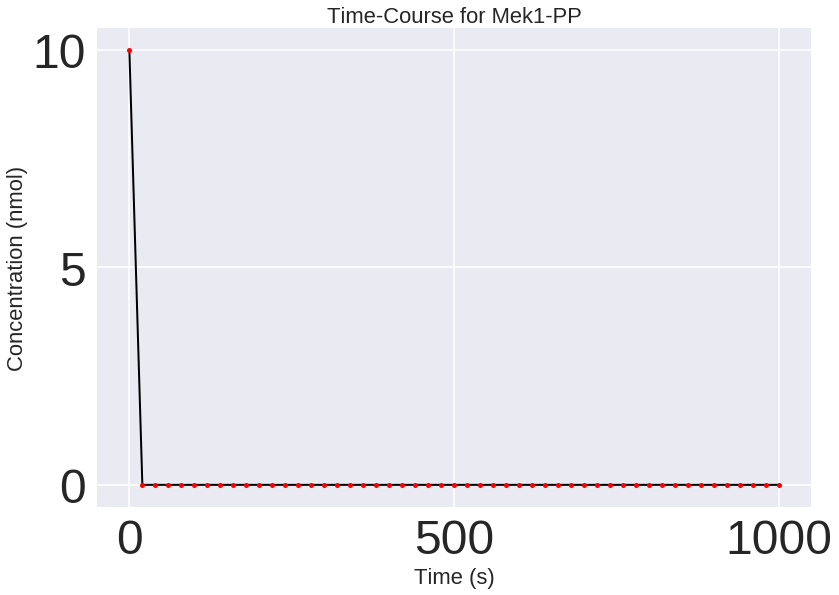

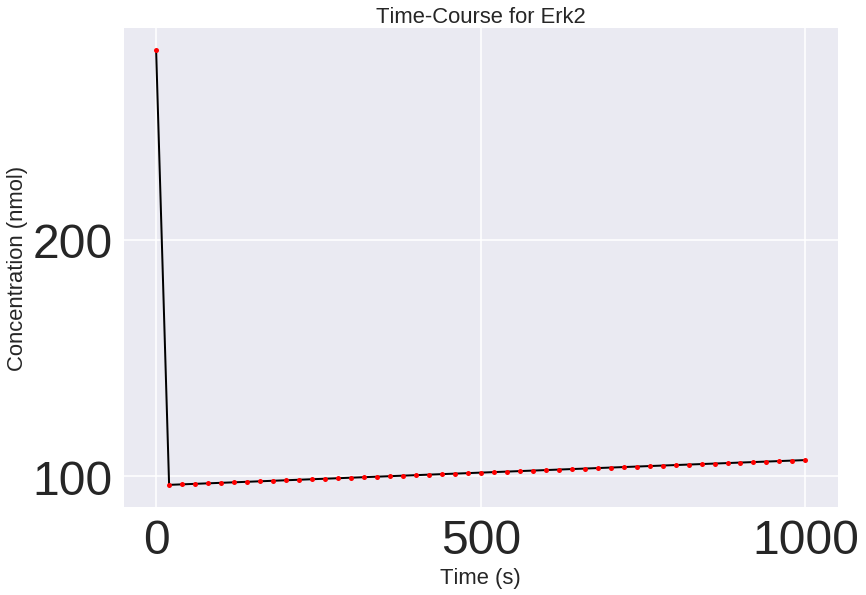

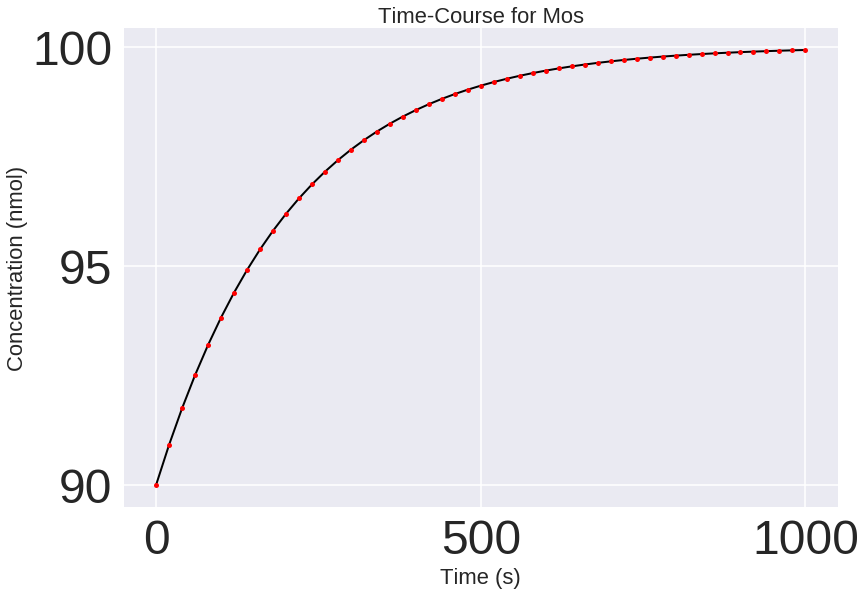

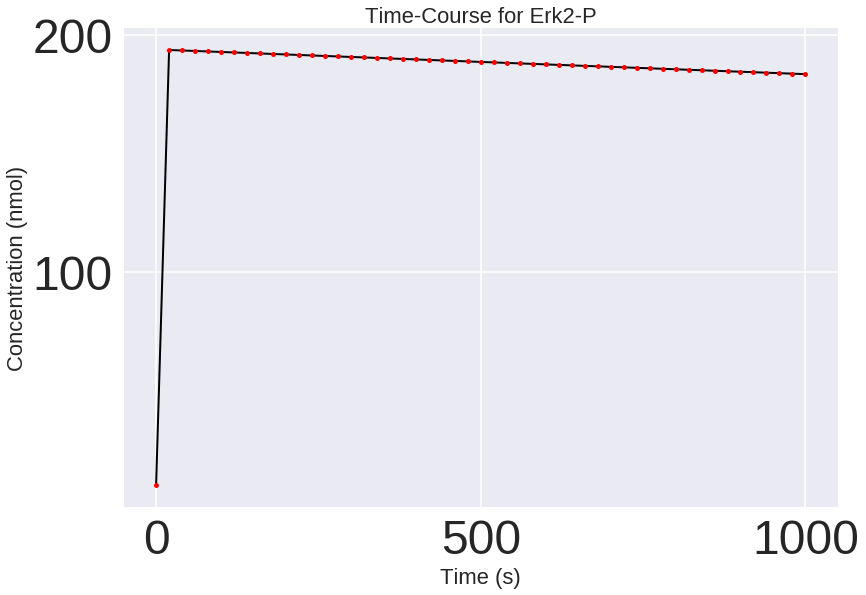

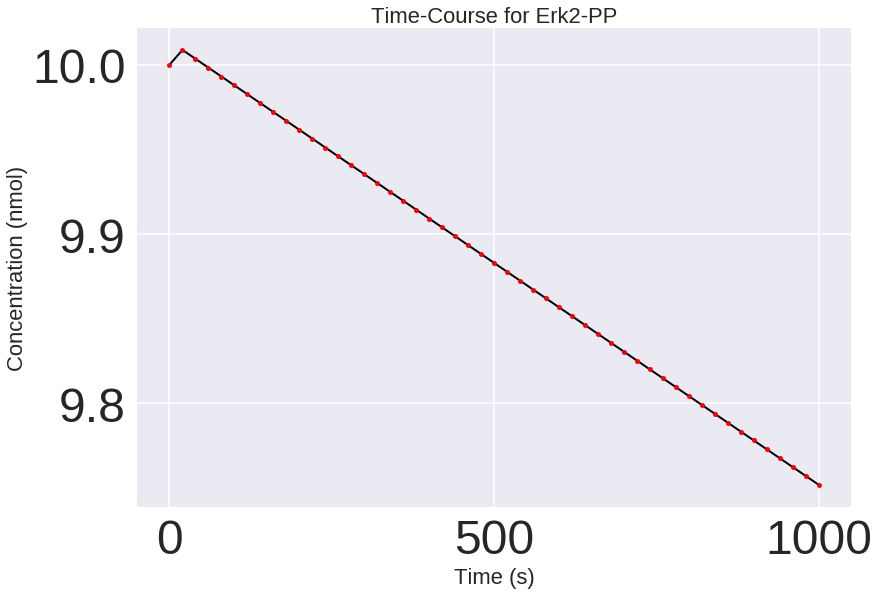

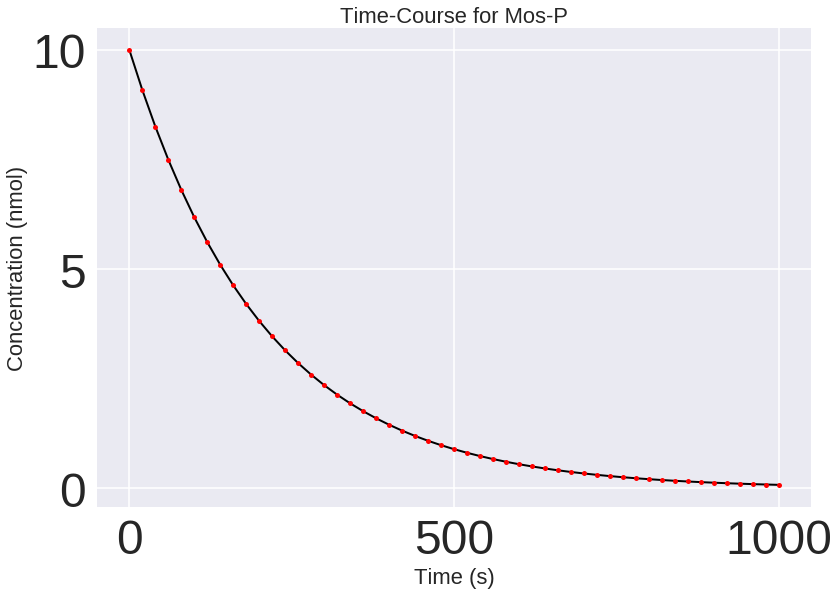

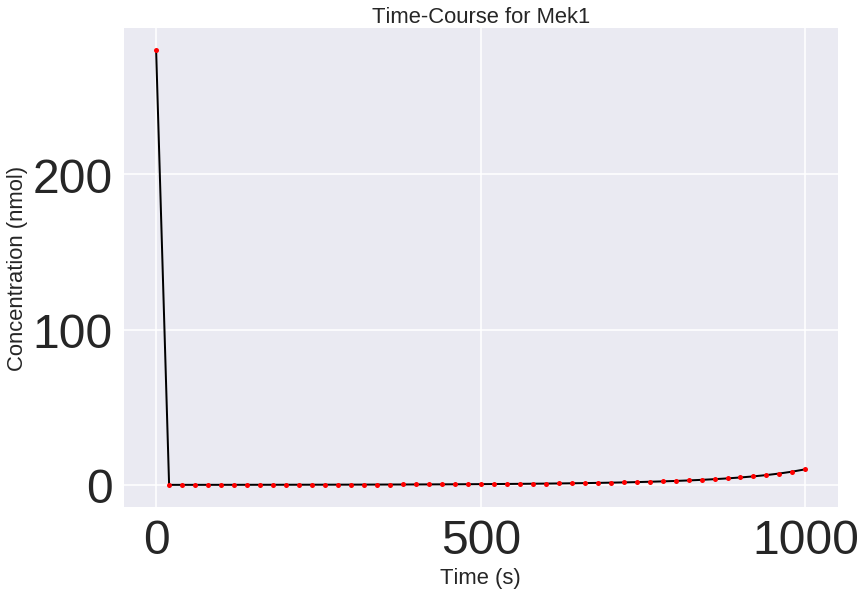

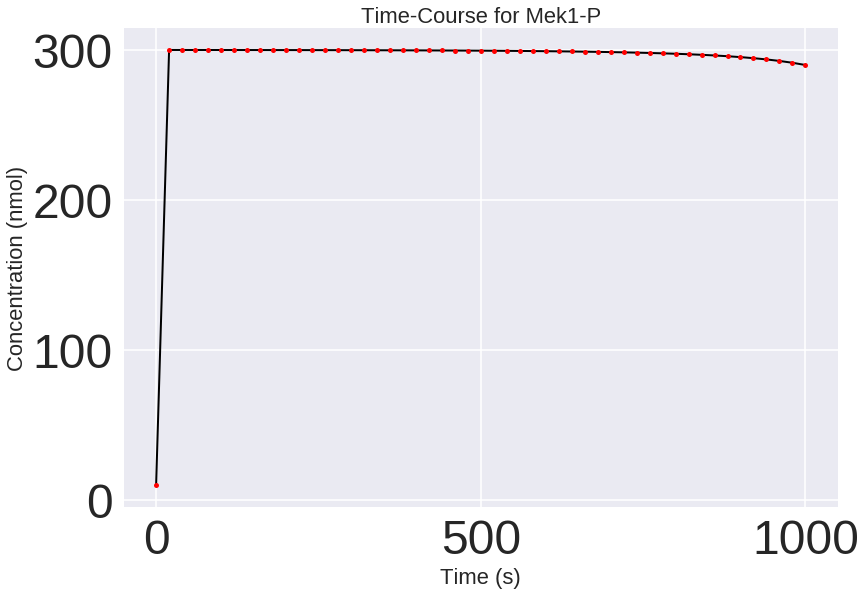

In [9]:
import PyCoTools,glob,os

TC = PyCoTools.pycopi.TimeCourse(kholodenko_model,
                            ReportName='kholodenko_timecourse_report.txt',
                            End=1000,
                            Intervals=50,
                            StepSize=20,
                            Plot='true',
                            SaveFig='true')

## check png files exist
for i in glob.glob('./TimeCourseGraphs/*'):
    print 'File {} exists: \t {}'.format(i,os.path.isfile(i))
    

You can also play around with graph graphics. Note that these arguments are simply passed on to matplotlib and therefore more documenation can be found [here](http://matplotlib.org/)

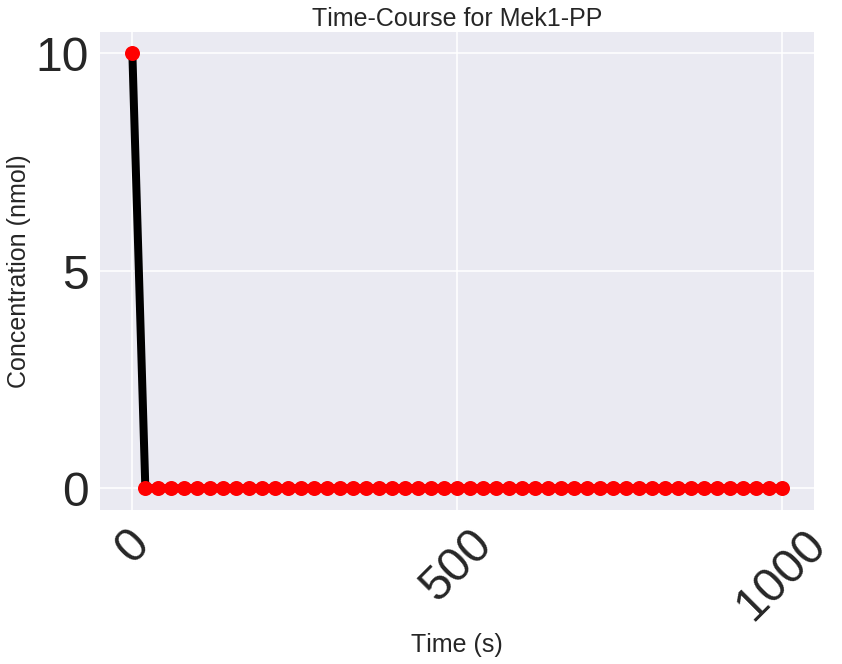

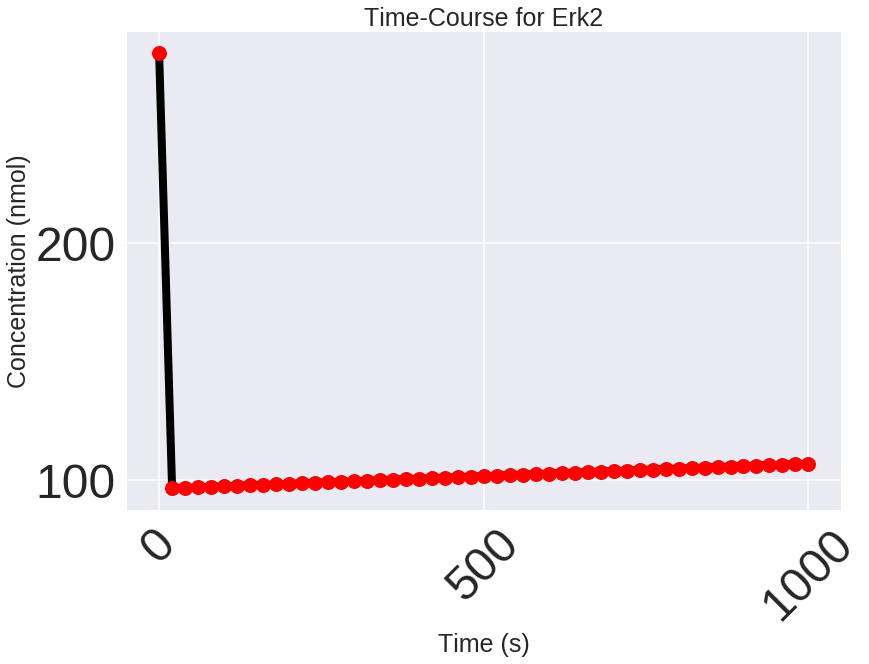

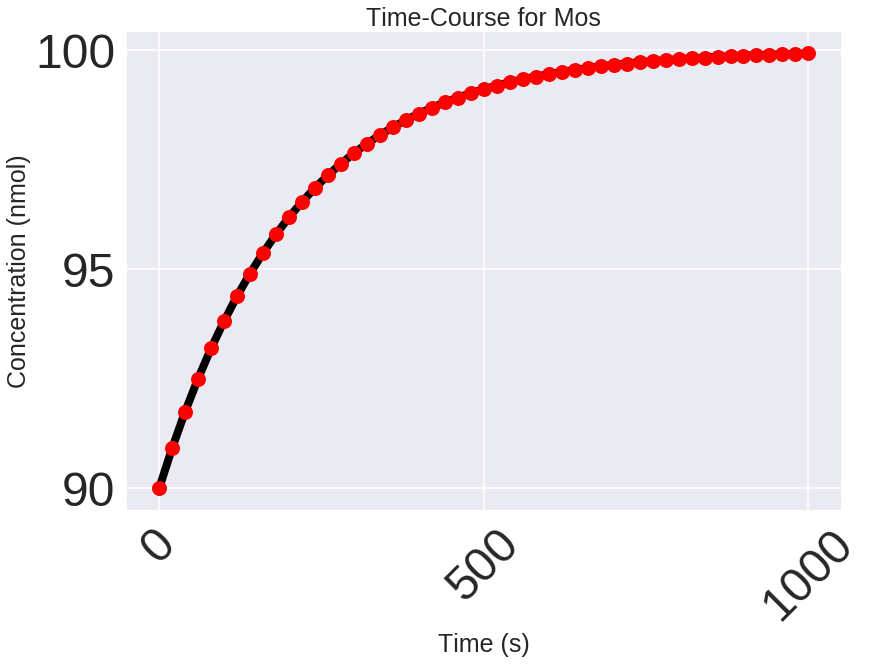

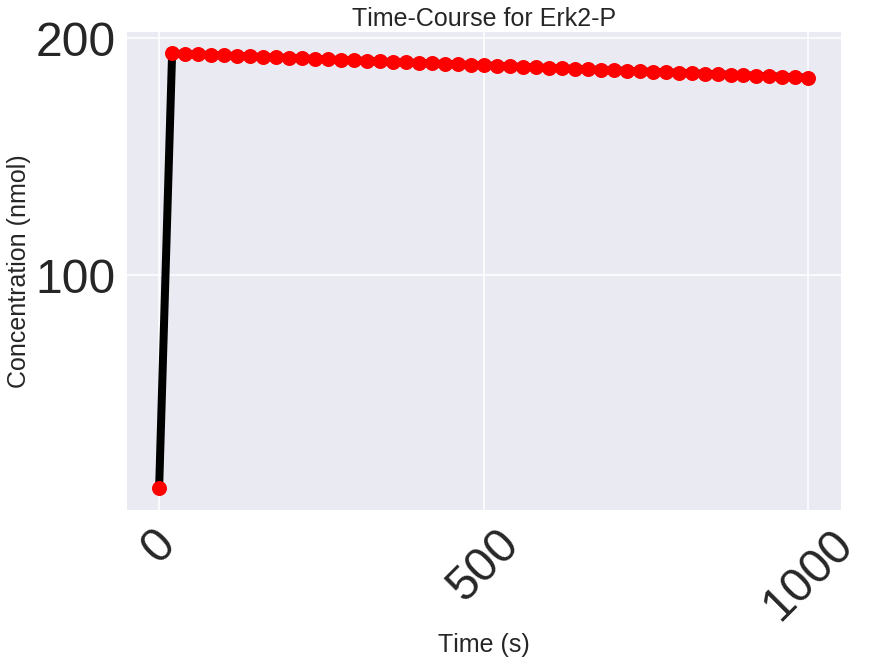

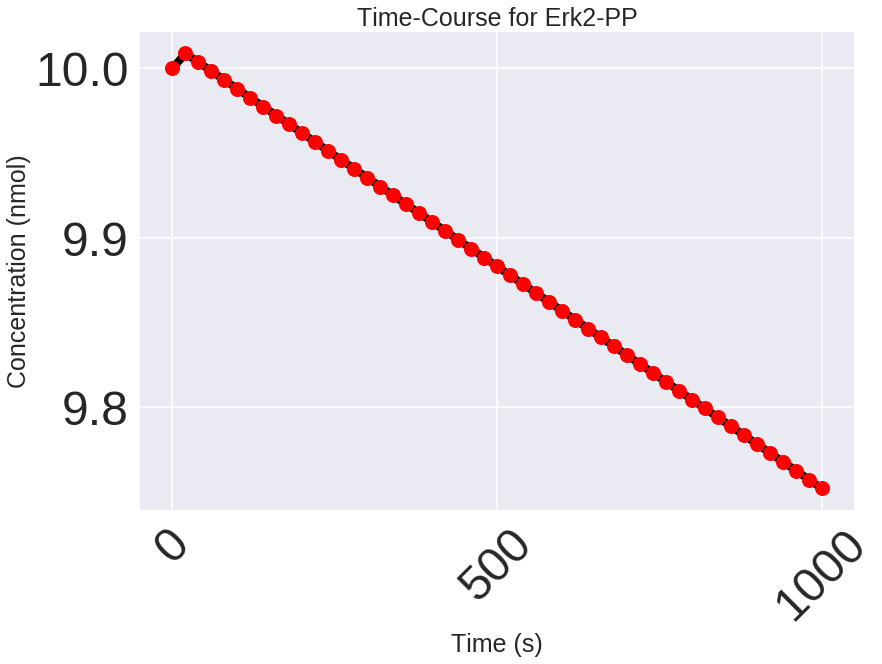

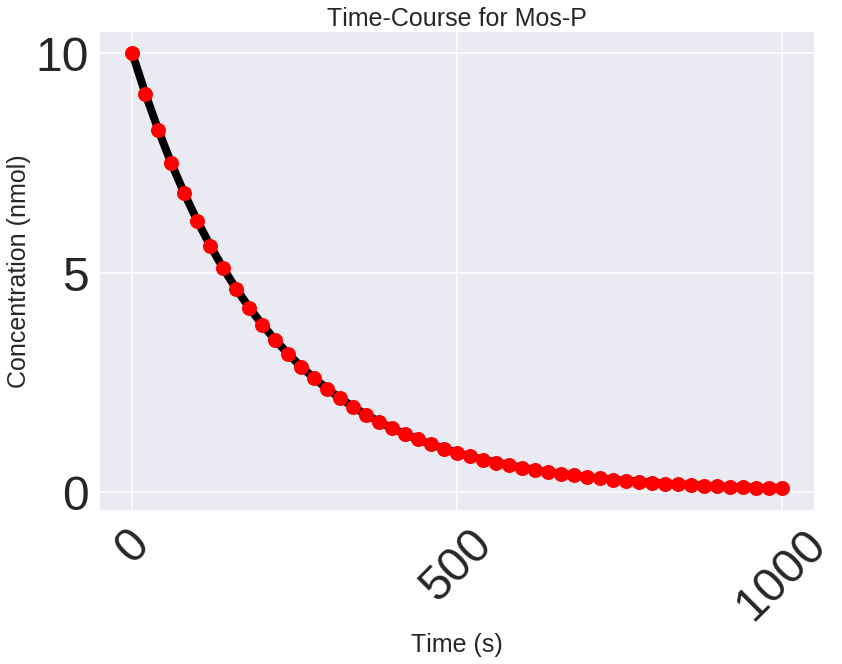

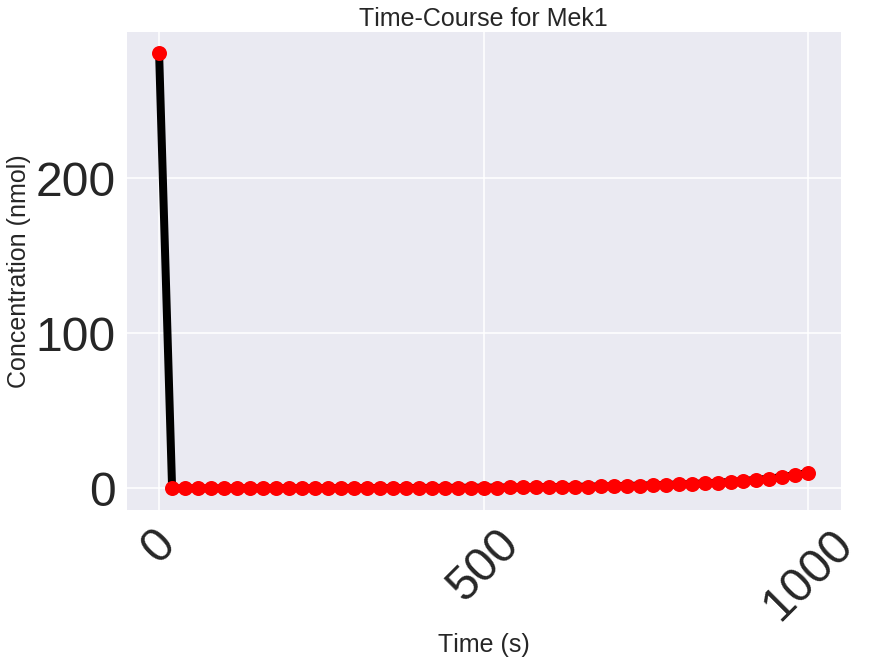

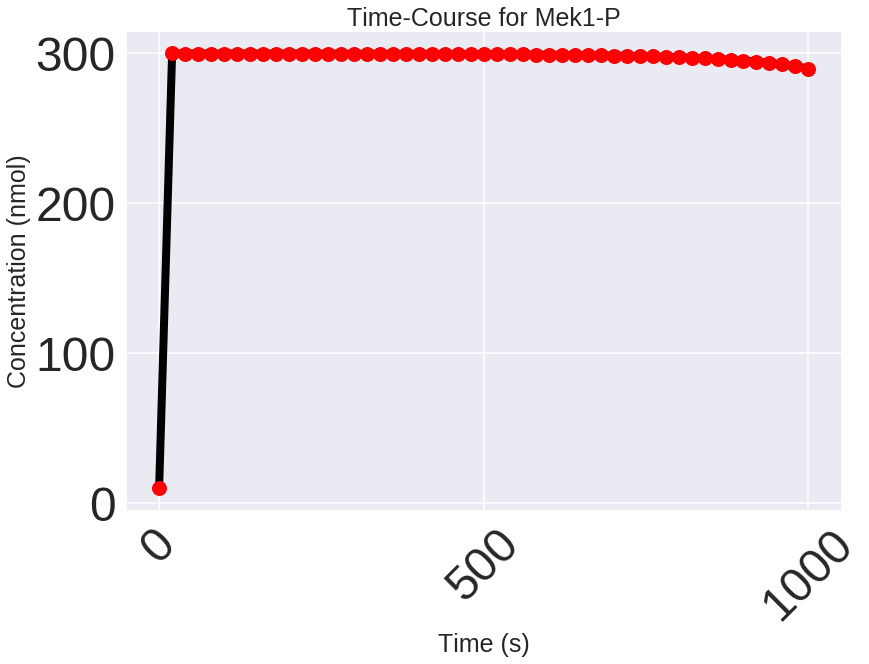

In [11]:
import os,PyCoTools
PyCoTools.pycopi.TimeCourse(kholodenko_model,
                            ReportName='kholodenko_timecourse_report.txt',
                            End=1000,
                            Intervals=50,
                            StepSize=20,
                            Plot='true',
                            SaveFig='true',
                            LineWidth=8,
                            MarkerSize=15,
                            AxisSize=20,
                            FontSize=25,
                            LineStyle='-',
                            XTickRotation=45)